#Projeto: Técnicas de Programação I
#Alunos: Aldenis França, Beatriz Soutilha, Hiago Freire e Matheus Wenzel.
#Professor: Alex Cavalera

###Nome da Base de Dados: CCEE - Brazil Energy Consumption
####Descrição da Base de Dados: Consumo de Energia Elétrica no Mercado Brasileiro. (Electrical energy consumption in the brazilian market)
####Link da base de dados: https://www.kaggle.com/datasets/danielluzzi/ccee-brazil-energy-consumption

###Informações Gerais da Base de Dados

In [352]:
# Importação e instalação de Bibliotecas para modelagem dos dados

!pip install plotly
!pip install nbformat
!pip install --upgrade nbformat
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [353]:
# Leitura e visualização das bases de dados
from zipfile import ZipFile
  
# Carregando o temp.zip e criando um zip object
with ZipFile("CCEE_BR_Data.csv.zip", 'r') as zObject:
  
    # Extraindo os membros do zip em um local específico.
    zObject.extractall(
        path="")

table = pd.read_csv('CCEE_BR_Data.csv', encoding='UTF-8')
table

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/07/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,0
1,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,0
2,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.68,0
3,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,0
4,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,0
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


### Análise Exploratória da Base de Dados

In [354]:
# Especificação do número de linhas e colunas da tabela

print(f'QUANTIDADE DE LINHAS: {table.shape[0]}\n')
print(f'QUANTIDADE DE COLUNAS: {table.shape[1]}')

QUANTIDADE DE LINHAS: 418611

QUANTIDADE DE COLUNAS: 7


In [355]:
# Tipos de variáveis de cada coluna e quantidade de valores não-nulos da base geral

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418611 entries, 0 to 418610
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        418611 non-null  object 
 1   Classe      418611 non-null  object 
 2   Ramo        418611 non-null  object 
 3   Submercado  418611 non-null  object 
 4   UF          418611 non-null  object 
 5   Consumo     418611 non-null  float64
 6   Covid       418611 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 22.4+ MB


In [356]:
# Quantidade de dados nulos em cada coluna da base geral

table.isnull().sum()

Data          0
Classe        0
Ramo          0
Submercado    0
UF            0
Consumo       0
Covid         0
dtype: int64

In [357]:
# Métricas estatísticas da tabela geral

table.describe()

,Consumo,Covid
count,418611.000000,418611.000000
mean,106.361081,0.130080
std,580.168023,0.336392
min,0.000000,0.000000
25%,1.620000,0.000000
50%,6.720000,0.000000
75%,30.255000,0.000000
max,14173.800000,1.000000


In [358]:
# Lista das classes de consumidores de energia

table['Classe'].unique().tolist()

['Autoprodutor',
 'Comercializador Varejista',
 'Consumidor Especial',
 'Consumidor Livre',
 'Distribuidor',
 'Exportador']

In [359]:
# Lista dos Ramos de consumidores de energia

table['Ramo'].unique().tolist()

['ALIMENTÍCIOS',
 'COMÉRCIO',
 'EXTRAÇÃO DE MINERAIS METÁLICOS',
 'MADEIRA PAPEL E CELULOSE',
 'MANUFATURADOS DIVERSOS',
 'METALURGIA E PRODUTOS DE METAL',
 'MINERAIS NÃO-METÁLICOS',
 'QUÍMICOS',
 'SERVIÇOS',
 'TÊXTEIS',
 'BEBIDAS',
 'SANEAMENTO',
 'TELECOMUNICAÇÕES',
 'TRANSPORTE',
 'VEÍCULOS',
 'ACR']

In [360]:
# Lista das submercados consumidores de energia

table['Submercado'].unique().tolist()

['NORDESTE', 'SUDESTE / CENTRO-OESTE', 'SUL', 'NORTE']

In [361]:
# Top 3 maiores Ramos Consumidores de Energia

table.groupby('Ramo')['Consumo'].sum().nlargest(3)

Ramo
ACR                               31044454.43
METALURGIA E PRODUTOS DE METAL     3375629.15
QUÍMICOS                           1411042.58
Name: Consumo, dtype: float64

In [362]:
# Consumo de Energia agrupado por estado (Jul/2018 - Jun/2020)

table.groupby('UF')['Consumo'].sum().sort_values(ascending=True)

UF
AC        88930.69
AP       153841.11
TO       224248.34
RO       322593.60
SE       339587.65
PI       391059.73
AL       407784.71
MS       509103.34
PB       517163.06
RN       522526.78
DF       593988.01
MA       720995.25
AM       753955.16
MT       803951.18
ES      1026721.42
CE      1158800.26
PE      1417378.47
GO      1486370.87
PA      1725883.96
SC      2263545.92
BA      2447270.38
RS      2761001.32
PR      2790061.68
RJ      4154876.09
MG      5072253.44
SP     11870026.25
Name: Consumo, dtype: float64

##Total

In [363]:
# Total de energia consumida por classe no periodo de julho/2018 até junho/2020
table_classe = table.groupby('Classe')['Consumo'].sum().sort_values(ascending=False)
#print(table_classe)

#table_classe_plot = table_classe.plot(kind='bar', 
#    rot=0, 
#    xlabel='Classes', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por classe (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True)

fig_classe = px.bar(table_classe, y='Consumo',title='Total de energia consumida por classe (Jul/2018 - Jun/2020', text = table_classe,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Classe": 'Classes'})
fig_classe.show()


fig_classe_pie = px.pie(table_classe, values='Consumo', names=table_classe.index,
                        title='Total de energia consumida por classe (Jul/2018 - Jun/2020',
                       labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Classe": 'Classes'})
fig_classe_pie.show()

In [364]:
# Total de energia consumida por ramo no periodo de julho/2018 até junho/2020
table_ramo = table.groupby('Ramo')['Consumo'].sum().sort_values(ascending=False)
#print(table_ramo)

# table_ramo_plot = table_ramo.plot(kind='bar', 
#    rot=90, 
#    xlabel='Ramo', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por ramo (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True )

fig_ramo = px.bar(table_ramo, y='Consumo',title='Total de energia consumida por ramo (Jul/2018 - Jun/2020)', text = table_ramo,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Ramo": 'Ramos'})
                                           
fig_ramo.show()

In [365]:
#Total de energia por estado consumida no periodo de julho/2018 até junho/2020

table_state = table.groupby('UF')['Consumo'].sum().sort_values(ascending=False)
#print(table_state)

# table_state_plot = table_state.plot(kind='bar', 
#    rot=0, 
#    xlabel='Classes', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por estado (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True )

fig_state = px.bar(table_state, y='Consumo',title='Total de energia consumida por estado (Jul/2018 - Jun/2020)', text = table_state,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "UF": 'Estado'})
fig_state.show()

fig_state_pie = px.pie(table_state, values='Consumo', names=table_state.index,
                        title='Total de energia consumida por estado (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Estado": 'Estado'})
fig_state_pie.show()

In [366]:
#Separando a região Sudeste da Centro-oeste
sudeste = table.loc[(table['UF']=='SP'),'Consumo'].sum() + table.loc[(table['UF']=='RJ'),'Consumo'].sum() + table.loc[(table['UF']=='MG'),'Consumo'].sum() + table.loc[(table['UF']=='ES'),'Consumo'].sum()
centro_oeste = table.loc[(table['UF']=='MT'),'Consumo'].sum() + table.loc[(table['UF']=='MS'),'Consumo'].sum() + table.loc[(table['UF']=='GO'),'Consumo'].sum() + table.loc[(table['UF']=='DF'),'Consumo'].sum()
sud_centroeste = pd.Series([sudeste, centro_oeste], index=['SUDESTE','CENTRO-OESTE']).rename("Consumo")
print(sud_centroeste)

SUDESTE         22123877.20
CENTRO-OESTE     2799425.39
Name: Consumo, dtype: float64


In [367]:
#Total de energia consumida por região (Jul/2018 - Jun/2020)
table_submercado = table.groupby('Submercado')['Consumo'].sum().sort_values(ascending=False)
table_submercado.drop(['SUDESTE / CENTRO-OESTE'],axis =0,inplace=True)
table_submercado = pd.concat([table_submercado,sud_centroeste],axis=0)
# print(table_submercado)

# table_submercado_plot = table_submercado.plot(kind='bar', 
#    rot=0, 
#    xlabel='Classes', 
#    ylabel='Consumo de Energia (MWm)',
#    title='Total de energia consumida por região (Jul/2018 - Jun/2020)', 
#    figsize=(17,10), grid=True )

fig_submercado = px.bar(table_submercado, y='Consumo',title='Total de energia consumida por região (Jul/2018 - Jun/2020)', text = table_submercado,
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Submercado": 'Estado'})
fig_submercado.show()

fig_submercado_pie = px.pie(table_submercado, values='Consumo', names=table_submercado.index,
                        title='Total de energia consumida por região (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Submercado": 'Região'})
fig_submercado_pie.show()

###Top 10 Maiores Estados Consumidores de Energia

In [368]:
# Top 10 Maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10 = table.groupby('UF')['Consumo'].sum().nlargest(10)
table_top10

UF
SP     11870026.25
MG      5072253.44
RJ      4154876.09
PR      2790061.68
RS      2761001.32
BA      2447270.38
SC      2263545.92
PA      1725883.96
GO      1486370.87
PE      1417378.47
Name: Consumo, dtype: float64

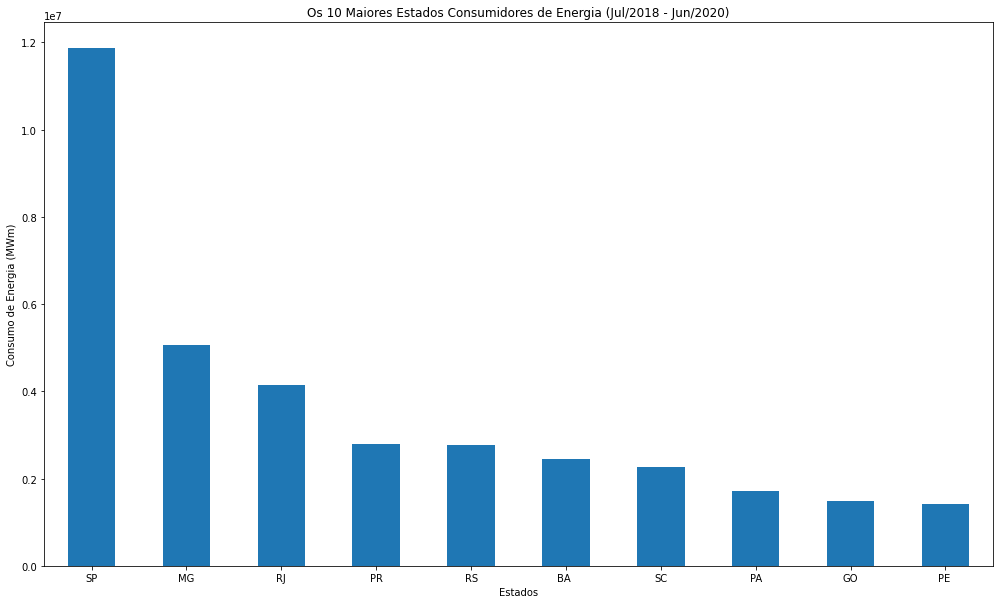

In [369]:
# Visualização Gráfica dos 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10_bar = table_top10.plot(kind='bar', rot=0, xlabel='Estados', 
                                   ylabel='Consumo de Energia (MWm)',
    title='Os 10 Maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)', 
    figsize=(17,10))

### Top 5 Maiores Estados Consumidores de Energia por Ramo

In [370]:
# Top 5 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top5 = pd.DataFrame(table.groupby('UF')['Consumo'].sum().nlargest(5))
table_top5.reset_index(['UF'], inplace=True)
uf_top5 = table_top5['UF'].tolist()
uf_top5

['SP', 'MG', 'RJ', 'PR', 'RS']

In [371]:
# Dataframes dos 5 maiores estados consumidores de energia por ramo no período 
#de julho/2018 até junho/2020.

lista_df = []

for i, uf in enumerate(uf_top5):
  df_uf = table['UF'][table['UF'] == uf]
  df_primeiro = pd.DataFrame(table.groupby([df_uf,'Ramo'])['Consumo'].sum().nlargest(5))
  df_primeiro.reset_index(['UF', 'Ramo'], inplace=True)
  lista_df.append(df_primeiro)

In [372]:
# Total de energia consumida dos 5 maiores estados consumidores por ramo no
# período de julho/2018 até junho/2020.

for df, uf in enumerate(uf_top5):

  fig_uf_ramo = px.bar(lista_df[df], x='Ramo', y='Consumo',title=f'Os 5 Maiores Ramos Consumidores de Energia em {uf} (Jul/2018 - Jun/2020)',
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "Ramo": 'Ramos'})
  fig_uf_ramo.show()


  fig_uf_ramo_pie = px.pie(lista_df[df], values='Consumo', names=lista_df[df].columns[1],
                        title=f'Os 5 Maiores Ramos Consumidores de Energia em {uf} (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo (MWm) ',
                           "Ramo": 'Ramo'})

  fig_uf_ramo_pie.show()

###Top 5 Maiores Ramos Consumidores de Energia por Estado (UF)

In [373]:
# Top 5 maiores Ramos Consumidores de Energia (Jul/2018 - Jun/2020)

table_top5 = pd.DataFrame(table.groupby('Ramo')['Consumo'].sum().nlargest(5))
table_top5.reset_index(['Ramo'], inplace=True)
ramo_top5 = table_top5['Ramo'].tolist()
ramo_top5

['ACR',
 'METALURGIA E PRODUTOS DE METAL',
 'QUÍMICOS',
 'MINERAIS NÃO-METÁLICOS',
 'ALIMENTÍCIOS']

In [374]:
# Dataframes dos 5 maiores ramos consumidores de energia por estado no período 
#de julho/2018 até junho/2020.

lista_df = []

for i, ramo in enumerate(ramo_top5):
  df_ramo = table['Ramo'][table['Ramo'] == ramo]
  df_primeiro = pd.DataFrame(table.groupby([df_ramo,'UF'])['Consumo'].sum().nlargest(5))
  df_primeiro.reset_index(['UF', 'Ramo'], inplace=True)
  lista_df.append(df_primeiro)

In [375]:
# Total de energia consumida dos 5 maiores ramos consumidores por estado no
# período de julho/2018 até junho/2020.

for df, ramo in enumerate(ramo_top5):

  fig_uf_ramo = px.bar(lista_df[df], x='UF', y='Consumo',title=f'Os 5 Maiores Estados Consumidores de Energia em {ramo} (Jul/2018 - Jun/2020)',
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "UF": 'Estados'})
  fig_uf_ramo.show()


  fig_uf_ramo_pie = px.pie(lista_df[df], values='Consumo', names=lista_df[df].columns[1],
                        title=f'Os 5 Maiores Estados Consumidores de Energia em {ramo} (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo (MWm) ',
                           "Ramo": 'Ramo'})

  fig_uf_ramo_pie.show()

###Classes Consumidoras de Energia por Ramo

In [376]:
# Classes Consumidoras de Energia (Jul/2018 - Jun/2020)

table_cls = pd.DataFrame(table.groupby('Classe')['Consumo'].sum()).sort_values('Consumo', ascending=False)
table_cls.reset_index(['Classe'], inplace=True)
classes = table_cls['Classe'].tolist()
classes

['Distribuidor',
 'Consumidor Livre',
 'Consumidor Especial',
 'Autoprodutor',
 'Comercializador Varejista',
 'Exportador']

In [377]:
# Dataframes dos 5 maiores ramos consumidores de energia por estado no período 
#de julho/2018 até junho/2020.

lista_df = []

for i, classe in enumerate(classes):
  df_classe = table['Classe'][table['Classe'] == classe]
  df_primeiro = pd.DataFrame(table.groupby([df_classe,'Ramo'])['Consumo'].sum().nlargest(5))
  df_primeiro.reset_index(['Classe', 'Ramo'], inplace=True)
  lista_df.append(df_primeiro)

In [378]:
# Total de energia consumida dos 5 maiores ramos consumidores por estado no
# período de julho/2018 até junho/2020.

for df, classe in enumerate(classes):

  fig_classe_ramo = px.bar(lista_df[df], x='Ramo', y='Consumo',title=f'Os 5 Maiores Ramos Consumidores de Energia em {classe} (Jul/2018 - Jun/2020)',
                   labels={"Consumo": 'Consumo de Energia (MWm)',
                           "UF": 'Estados'})
  fig_classe_ramo.show()


  fig_classe_ramo_pie = px.pie(lista_df[df], values='Consumo', names=lista_df[df].columns[1],
                        title=f'Os 5 Maiores Ramos Consumidores de Energia em {classe} (Jul/2018 - Jun/2020)',
                       labels={"Consumo": 'Consumo (MWm) ',
                           "Classe": 'Classe'})

  fig_classe_ramo_pie.show()

###Estudo do Impacto da COVID

In [379]:
#descobrindo os dias com COVID
covid_days = list(set(table.loc[table['Covid'] == 1]['Data']))
covid = table[table['Data'].isin(covid_days)]
covid

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
364158,25/03/2020,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.23,1
364159,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,1
364160,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,1.62,1
364161,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUL,RS,1.13,1
364162,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUL,PR,1.86,1
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


In [380]:
#dias sem COVID
covid_days = [f'{x[:-2]}19' for x in covid_days]
no_covid = table[table['Data'].isin(covid_days)]
no_covid

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
149800,25/03/2019,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.20,0
149801,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.02,0
149802,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,1.01,0
149803,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUL,SC,2.51,0
149804,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUL,RS,1.36,0
...,...,...,...,...,...,...,...
199691,19/06/2019,Distribuidor,ACR,SUL,SC,2124.32,0
199692,19/06/2019,Distribuidor,ACR,SUL,RS,2685.83,0
199693,19/06/2019,Distribuidor,ACR,SUL,PR,2696.13,0
199694,19/06/2019,Exportador,SERVIÇOS,SUL,SC,0.00,0


In [381]:
print(f"2019: {'Normal' if stats.normaltest(no_covid['Consumo']).pvalue > 0.05 else 'Não Normal'},\
 2020: {'Normal' if stats.normaltest(covid['Consumo']).pvalue > 0.05 else 'Não Normal'}")
print(f"{'Diferença não significativa' if stats.mannwhitneyu(no_covid['Consumo'], covid['Consumo']).pvalue > 0.05 else 'Diferença significativa'}")
somas = [no_covid.sum()['Consumo'], covid.sum()['Consumo']]
fig = px.bar(x=['2019','2020'], y=somas, color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia total no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

2019: Não Normal, 2020: Não Normal
Diferença significativa


In [382]:
#consumo por classe em 2019
agregado_no_covid = no_covid.groupby(by='Classe').agg(list)
consumo_classe_no_covid = agregado_no_covid.drop(['Data','Ramo','Submercado','UF','Covid'], axis=1)
consumo_classe_no_covid['Consumo'] = [sum(x) for x in consumo_classe_no_covid['Consumo']]
consumo_classe_no_covid

,Consumo
Classe,
Autoprodutor,192823.11
Comercializador Varejista,2745.61
Consumidor Especial,362840.70
Consumidor Livre,1092551.03
Distribuidor,3766007.69
Exportador,0.00


In [383]:
#consumo por classe em 2020
agregado_covid = covid.groupby(by='Classe').agg(list)
consumo_classe_covid = agregado_covid.drop(['Data','Ramo','Submercado','UF','Covid'], axis=1)
consumo_classe_covid['Consumo'] = [sum(x) for x in consumo_classe_covid['Consumo']]
consumo_classe_covid

,Consumo
Classe,
Autoprodutor,166750.43
Comercializador Varejista,4790.91
Consumidor Especial,266479.58
Consumidor Livre,1045539.92
Distribuidor,3393386.44
Exportador,0.00


In [384]:
for class_name in consumo_classe_covid.index.to_list()[:-1]:
    classe = pd.DataFrame({
        '2019' : consumo_classe_no_covid.loc[f'{class_name}'],
        '2020' : consumo_classe_covid.loc[f'{class_name}']
    }).T

    fig = px.bar(x=classe.index, y=classe['Consumo'], color_discrete_sequence=['darkslateblue'],
        title=f'Consumo de energia da classe "{class_name}" no período de 25/03 a 19/06',
        labels={'x': 'Ano', 'y':'MWm'})
    fig.show()

In [385]:
#diferença de consumo por estado nos períodos prévios
estados_no_covid = no_covid.drop(['Covid'],axis=1).groupby(by='UF')\
    .agg(sum).sort_values(by='Consumo')
estados_covid = covid.drop(['Covid'],axis=1).groupby(by='UF')\
    .agg(sum).sort_values(by='Consumo')
diferencas = pd.DataFrame(data=[estados_covid.loc[estado] - estados_no_covid.loc[estado] for estado in estados_covid.index],
    index=estados_covid.index, columns=['Consumo']).sort_values(by='Consumo')
fig = px.bar(x=diferencas.index, y=diferencas['Consumo'], color_discrete_sequence=['darkslateblue'],
    title='Diferença de consumo de energia no período de 25/03 a 19/06 entre 2020 e 2019',
    labels={'x': 'Estados', 'y':'MWm'})
fig.show()

In [386]:
energia = pd.read_csv('Brazil_energy_data.csv')
energia_2019_2020 = pd.DataFrame(data=[energia.loc[energia['year']==2019]['electricity_demand'].values, 
    energia.loc[energia['year']==2020]['electricity_demand'].values],
    index=['2019','2020'], columns=['KWh'])
fig = px.bar(x=energia_2019_2020.index, y=energia_2019_2020['KWh'], color_discrete_sequence=['darkslateblue'],
    title='Demanda de eletricidade no Brasil',
    labels={'x': 'Ano', 'y':'KWh'})
fig.show()

In [387]:
energia = pd.read_csv('Brazil_energy_data.csv')
energia_2019_2020 = pd.DataFrame(data=[energia.loc[energia['year']==2019]['electricity_generation'].values, 
    energia.loc[energia['year']==2020]['electricity_generation'].values],
    index=['2019','2020'], columns=['KWh'])
fig = px.bar(x=energia_2019_2020.index, y=energia_2019_2020['KWh'], color_discrete_sequence=['darkslateblue'],
    title='Geração de eletricidade no Brasil',
    labels={'x': 'Ano', 'y':'KWh'})
fig.show()

###Nome da Base de Dados: Brazil Energy Dataset (Energy Dataset Country-Wise (1900-2021))
####Descrição da Base de Dados: Essa base de dados contém o consumo de energia nacional e a geração de energia de várias fontes, nesse caso selecionamos apenas dados do Brasil (This dataset contains country-wise energy consumption and energy generation from various sources, in this case we're only using data from Brazil)
####Link da base de dados: https://www.kaggle.com/datasets/pranjalverma08/energy-dataset-countrywise-19002021?select=Brazil_energy_data.csv

###Informações Gerais da Base de Dados

In [388]:
# Visualização da base de dados
energy_table = pd.read_csv('Brazil_energy_data.csv')
energy_table

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,BRA,Brazil,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BRA,Brazil,1901,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRA,Brazil,1902,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BRA,Brazil,1903,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BRA,Brazil,1904,NaN,0.000,NaN,0.000,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,BRA,Brazil,2017,-18.682,-5.819,12.676,30.578,4.491,71.136,1.265,...,2.080,3.994,10.006,7.337,25.785,3.169,21.716,105.933,203.865,509.702
118,BRA,Brazil,2018,8.369,2.120,-7.428,-20.191,-1.471,-24.346,0.675,...,8.603,16.518,41.070,8.200,13.731,3.579,14.546,120.479,231.394,575.164
119,BRA,Brazil,2019,-8.395,-2.304,2.322,5.842,7.525,122.710,2.512,...,16.478,31.557,78.077,9.111,15.068,4.018,18.153,138.633,265.293,656.873
120,BRA,Brazil,2020,4.180,1.051,-7.062,-18.183,5.582,97.883,-3.328,...,19.635,50.574,92.374,9.172,1.462,4.217,2.027,140.660,268.396,661.742


In [389]:
# Período considerado: 2018-2021

actual_table = energy_table.loc[(energy_table['year'] >= 2018)]
actual_table


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
118,BRA,Brazil,2018,8.369,2.120,-7.428,-20.191,-1.471,-24.346,0.675,...,8.603,16.518,41.070,8.200,13.731,3.579,14.546,120.479,231.394,575.164
119,BRA,Brazil,2019,-8.395,-2.304,2.322,5.842,7.525,122.710,2.512,...,16.478,31.557,78.077,9.111,15.068,4.018,18.153,138.633,265.293,656.873
120,BRA,Brazil,2020,4.180,1.051,-7.062,-18.183,5.582,97.883,-3.328,...,19.635,50.574,92.374,9.172,1.462,4.217,2.027,140.660,268.396,661.742
121,BRA,Brazil,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,58.320,NaN,11.279,NaN,NaN,NaN,NaN,337.580,NaN


In [390]:
#  Métricas estatísticas da Base de Dados
actual_table.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.00000,3.000000
mean,2019.500000,1.384667,0.289000,-4.056000,-10.844000,3.878667,65.415667,-0.047000,-2.569000,8.287500,...,14.905333,39.242250,70.507000,9.440500,10.087000,3.938000,11.575333,133.257333,275.66575,631.259667
std,1.290994,8.724583,2.308339,5.526541,14.485336,4.733710,78.720789,2.986195,102.043092,0.494557,...,5.681656,18.866405,26.476476,1.303787,7.499324,0.326437,8.463487,11.112674,44.54887,48.641234
min,2018.000000,-8.395000,-2.304000,-7.428000,-20.191000,-1.471000,-24.346000,-3.328000,-114.829000,7.646000,...,8.603000,16.518000,41.070000,8.200000,1.462000,3.579000,2.027000,120.479000,231.39400,575.164000
25%,2018.750000,-2.107500,-0.626500,-7.245000,-19.187000,2.055500,36.768500,-1.326500,-46.134500,8.051000,...,12.540500,27.797250,59.573500,8.883250,7.596500,3.798500,8.286500,129.556000,256.81825,616.018500
50%,2019.500000,4.180000,1.051000,-7.062000,-18.183000,5.582000,97.883000,0.675000,22.560000,8.355500,...,16.478000,41.065500,78.077000,9.141500,13.731000,4.018000,14.546000,138.633000,266.84450,656.873000
75%,2020.250000,6.274500,1.585500,-2.370000,-6.170500,6.553500,110.296500,1.593500,53.561000,8.592000,...,18.056500,52.510500,85.225500,9.698750,14.399500,4.117500,16.349500,139.646500,285.69200,659.307500
max,2021.000000,8.369000,2.120000,2.322000,5.842000,7.525000,122.710000,2.512000,84.562000,8.793000,...,19.635000,58.320000,92.374000,11.279000,15.068000,4.217000,18.153000,140.660000,337.58000,661.742000


In [391]:
# Quantidade de dados nulos em cada coluna da base geral

actual_table.isnull().sum()


iso_code                  0
country                   0
year                      0
coal_prod_change_pct      1
coal_prod_change_twh      1
                         ..
wind_share_energy         1
wind_cons_change_twh      1
wind_consumption          1
wind_elec_per_capita      0
wind_energy_per_capita    1
Length: 128, dtype: int64

In [392]:
# Visualização de todas as colunas da base
print(*pd.Series(actual_table.columns).to_list(), sep='\n')

iso_code
country
year
coal_prod_change_pct
coal_prod_change_twh
gas_prod_change_pct
gas_prod_change_twh
oil_prod_change_pct
oil_prod_change_twh
energy_cons_change_pct
energy_cons_change_twh
biofuel_share_elec
biofuel_elec_per_capita
biofuel_cons_change_pct
biofuel_share_energy
biofuel_cons_change_twh
biofuel_consumption
biofuel_cons_per_capita
carbon_intensity_elec
coal_share_elec
coal_cons_change_pct
coal_share_energy
coal_cons_change_twh
coal_consumption
coal_elec_per_capita
coal_cons_per_capita
coal_production
coal_prod_per_capita
electricity_demand
biofuel_electricity
coal_electricity
fossil_electricity
gas_electricity
hydro_electricity
nuclear_electricity
oil_electricity
other_renewable_exc_biofuel_electricity
other_renewable_electricity
renewables_electricity
solar_electricity
wind_electricity
electricity_generation
greenhouse_gas_emissions
energy_per_gdp
energy_per_capita
fossil_cons_change_pct
fossil_share_energy
fossil_cons_change_twh
fossil_fuel_consumption
fossil_energy_per_

Consumo de Energia em todo o Brasil (2019)

In [393]:
# Consumo de energia em todo o Brasil em 2019
df_consumo = table.copy()
df_consumo['Data'] = pd.to_datetime(df_consumo['Data'], format='%d/%m/%Y').dt.year
df_consumo = df_consumo[df_consumo['Data'] == 2019]
df_consumo = df_consumo.groupby('Data')['Consumo'].sum()
df_consumo # energia consumida em MWm

Data
2019    22822383.79
Name: Consumo, dtype: float64

Geração de Energia em todo o Brasil (2019)

In [394]:
# Geração de energia em todo o Brasil em 2019
df_generation = actual_table[(actual_table['year'] == 2019)]
df_generation = df_generation.loc[:, ["year", "population", "per_capita_electricity"]]
df_generation["Geração (MWm)"] = (df_generation["population"] * df_generation["per_capita_electricity"])/24000
df_generation


,year,population,per_capita_electricity,Geração (MWm)
119,2019,211049520.0,2911.876,2.560625e+07


# Consumo e Geração de Energia Elértrica no Brasil (2019)

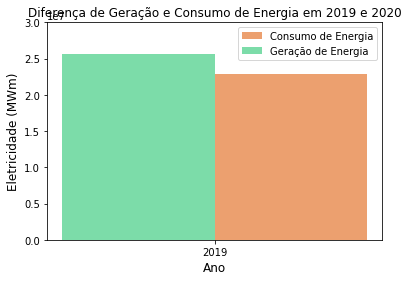

In [395]:
import matplotlib.pyplot as plt
# Plotar o primeiro dataframe
bar_width = 0.4
plt.bar(df_consumo.index + bar_width/2, df_consumo.values,bar_width, label='Consumo de Energia', color='#ECA06F')

# Plotar o segundo dataframe
plt.bar(df_generation['year'] - bar_width/2,df_generation['Geração (MWm)'], bar_width, label='Geração de Energia', color='#7CDCA9')

plt.title("Diferença de Geração e Consumo de Energia em 2019 e 2020", fontsize=12)
plt.xticks(df_generation["year"], labels=["2019"])
plt.xlabel('Ano', fontsize=12)
plt.yticks(np.arange(0, 31000000,5000000))
plt.ylabel('Eletricidade (MWm)', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), fontsize=10)
# Adicionar legenda
plt.legend()

# Mostrar o plot
plt.show()


### Matriz Energética do Brasil (2020)

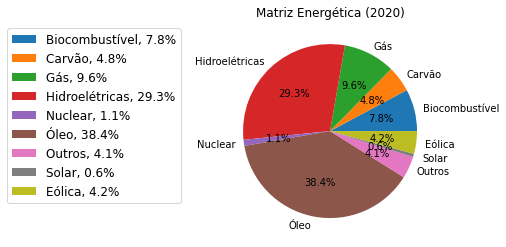

In [396]:
matriz = actual_table[actual_table['year'] == 2020]
matriz = matriz.loc[:, matriz.columns.str.contains('share_energy')]
matriz = matriz.drop(["low_carbon_share_energy","renewables_share_energy","fossil_share_energy"],axis=1)
my_labels = ["Biocombustível","Carvão","Gás","Hidroelétricas", "Nuclear", "Óleo", "Outros","Solar","Eólica"]
plt.pie(matriz.values[0], labels=my_labels,autopct='%1.1f%%')
plt.title('Matriz Energética (2020)')
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / sum(matriz.values[0])) * 100) for l, s in zip(my_labels, matriz.values[0])],
    prop={'size': 12},
    bbox_to_anchor=(-0.16, 1),
)
plt.show()



### Matriz Energética por Renováveis no Brasil (2020)

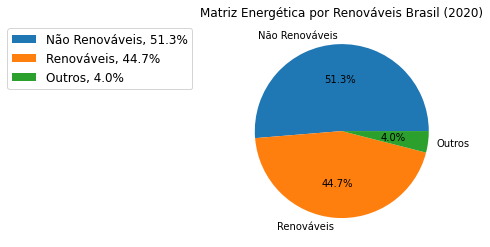

In [397]:
matriz = actual_table[actual_table['year'] == 2020]
matriz = matriz.loc[:, ["fossil_share_energy","renewables_share_energy","other_renewables_share_energy"]]
my_labels = ["Não Renováveis", "Renováveis","Outros"]
plt.pie(matriz.values[0], labels=my_labels, autopct='%1.1f%%')
plt.title('Matriz Energética por Renováveis Brasil (2020)')
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / sum(matriz.values[0])) * 100) for l, s in zip(my_labels, matriz.values[0])],
    prop={'size': 12},
    bbox_to_anchor=(-0.16, 1),
)
plt.show()



### Matriz Elétrica no Brasil (2020)

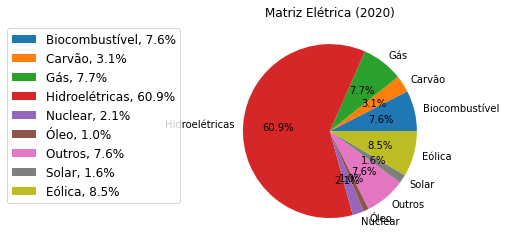

In [398]:
matriz = actual_table[actual_table['year'] == 2020]
matriz = matriz.loc[:, matriz.columns.str.endswith('share_elec')]
matriz = matriz.drop(
    ["low_carbon_share_elec", "renewables_share_elec", "fossil_share_elec"], axis=1)
my_labels = ["Biocombustível", "Carvão", "Gás",
             "Hidroelétricas", "Nuclear", "Óleo", "Outros", "Solar", "Eólica"]
plt.pie(matriz.values[0], labels=my_labels, autopct='%1.1f%%')
plt.title('Matriz Elétrica (2020)')
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / sum(matriz.values[0])) * 100) for l, s in zip(my_labels, matriz.values[0])],
    prop={'size': 12},
    bbox_to_anchor=(-0.16, 1),
)
plt.show()


### Matriz Elétrica por Renováveis no Brasil (2020)

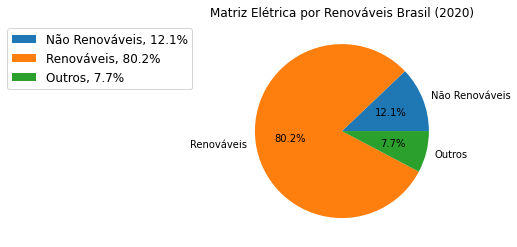

In [399]:
matriz = actual_table[actual_table['year'] == 2020]
matriz = matriz.loc[:, ["fossil_share_elec",
                        "renewables_share_elec", "other_renewables_share_elec"]]
my_labels = ["Não Renováveis", "Renováveis", "Outros"]
plt.pie(matriz.values[0], labels=my_labels, autopct='%1.1f%%')
plt.title('Matriz Elétrica por Renováveis Brasil (2020)')
plt.legend(
    loc='upper right',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / sum(matriz.values[0])) * 100) for l, s in zip(my_labels, matriz.values[0])],
    prop={'size': 12},
    bbox_to_anchor=(-0.16, 1),
)
plt.show()


# Informacões sobre Eletricidade no Geral

In [400]:
# Dataframe com informações apenas de eletricidade
df = actual_table.loc[:, actual_table.columns.str.contains('electricity')]
df_elec = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_elec


,year,electricity_demand,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_exc_biofuel_electricity,other_renewable_electricity,renewables_electricity,solar_electricity,wind_electricity,electricity_generation,low_carbon_electricity,per_capita_electricity
0,2018,626.05,51.97,22.61,86.42,52.20,385.08,15.67,11.61,0.0,51.97,488.98,3.46,48.47,591.07,504.65,2821.750
1,2019,639.51,52.39,23.33,90.39,57.66,393.90,15.22,9.40,0.0,52.39,508.94,6.66,55.99,614.55,524.16,2911.876
2,2020,646.73,50.92,21.05,79.74,51.78,409.50,14.05,6.91,0.0,50.92,528.22,10.75,57.05,622.01,542.27,2926.288
3,2021,665.18,48.97,26.60,120.25,78.33,371.81,14.71,15.32,0.0,48.97,505.50,12.48,72.24,640.46,520.21,2992.895


# Dataframes com informações específicas por escopo

In [401]:
# Dataframe com informações apenas de carvão
df = actual_table.loc[:, actual_table.columns.str.contains('coal')]
df_coal = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_coal

,year,coal_prod_change_pct,coal_prod_change_twh,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,coal_electricity
0,2018,8.369,2.120,3.825,-2.219,5.673,-4.333,190.938,107.939,911.535,27.449,131.039,22.61
1,2019,-8.395,-2.304,3.796,-5.711,5.218,-10.904,180.034,110.543,853.044,25.144,119.139,23.33
2,2020,4.180,1.051,3.384,-10.670,4.822,-19.210,160.825,99.031,756.610,26.195,123.237,21.05
3,2021,NaN,NaN,4.153,NaN,NaN,NaN,NaN,124.303,NaN,NaN,NaN,26.60


In [402]:
# Dataframe com informações apenas de gás
df = actual_table.loc[:, actual_table.columns.str.contains('gas')]
df_gas = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_gas


,year,gas_prod_change_pct,gas_prod_change_twh,gas_electricity,greenhouse_gas_emissions,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita
0,2018,-7.428,-20.191,52.20,74.33,8.831,-4.627,10.663,-17.412,358.908,249.201,1713.417,251.624,1201.243
1,2019,2.322,5.842,57.66,76.58,9.382,-0.439,10.356,-1.574,357.333,273.206,1693.128,257.465,1219.928
2,2020,-7.062,-18.183,51.78,70.33,8.325,-10.117,9.629,-36.152,321.182,243.602,1511.022,239.282,1125.717
3,2021,NaN,NaN,78.33,92.66,12.230,NaN,NaN,NaN,NaN,366.039,NaN,NaN,NaN


In [403]:
# Dataframe com informações apenas de óleo
df = actual_table.loc[:, actual_table.columns.str.contains('oil')]
df_oil = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_oil


,year,oil_prod_change_pct,oil_prod_change_twh,oil_electricity,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita
0,2018,-1.471,-24.346,11.61,1.964,-3.750,38.963,-51.088,1311.409,55.426,6260.629,1630.797,7785.372
1,2019,7.525,122.710,9.40,1.530,1.887,38.725,24.751,1336.160,44.539,6331.029,1753.507,8308.508
2,2020,5.582,97.883,6.91,1.111,-4.228,38.364,-56.496,1279.664,32.509,6020.270,1851.390,8709.988
3,2021,NaN,NaN,15.32,2.392,NaN,NaN,NaN,NaN,71.591,NaN,NaN,NaN


In [404]:
# Dataframe com informações apenas de biocombustível
df = actual_table.loc[:, actual_table.columns.str.contains('biofuel')]
df_biofuel = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_biofuel = df_biofuel.iloc[:, :-3]
df_biofuel


,year,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,biofuel_electricity
0,2018,8.793,248.103,15.999,6.971,32.361,234.628,1120.106,51.97
1,2019,8.525,248.236,11.062,7.552,25.954,260.582,1234.697,52.39
2,2020,8.186,239.557,-0.106,7.804,-0.277,260.305,1224.622,50.92
3,2021,7.646,228.839,NaN,NaN,NaN,NaN,NaN,48.97


In [405]:
# Dataframe com informações apenas de fóssil
df = actual_table.loc[:, actual_table.columns.str.contains('fossil')]
df_fossil = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_fossil


,year,fossil_electricity,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec
0,2018,86.42,-3.766,55.299,-72.833,1861.256,8885.581,412.566,14.621
1,2019,90.39,0.659,54.299,12.272,1873.529,8877.200,428.288,14.708
2,2020,79.74,-5.970,52.815,-111.857,1761.672,8287.902,375.142,12.820
3,2021,120.25,NaN,NaN,NaN,NaN,NaN,561.933,18.776


In [406]:
# Dataframe com informações apenas de Hidroelétricas
df = actual_table.loc[:, actual_table.columns.str.contains('hydro')]
df_hydro = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_hydro


,year,hydro_electricity,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita
0,2018,385.08,65.150,4.257,28.722,39.475,966.742,1838.360,4615.195
1,2019,393.90,64.096,1.912,28.554,18.489,985.231,1866.387,4668.243
2,2020,409.50,65.835,-0.637,29.349,-6.280,978.950,1926.520,4605.538
3,2021,371.81,58.054,NaN,NaN,NaN,NaN,1737.483,NaN


In [407]:
# Dataframe com informações apenas de baixo carbono
df = actual_table.loc[:, actual_table.columns.str.contains('low_carbon')]
df_lowcarbon = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_lowcarbon


,year,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita
0,2018,85.379,504.65,2409.183,6.769,44.701,95.393,1504.568,7182.762
1,2019,85.292,524.16,2483.588,4.805,45.701,72.290,1576.858,7471.508
2,2020,87.180,542.27,2551.146,-0.188,47.185,-2.972,1573.886,7404.454
3,2021,81.224,520.21,2430.962,NaN,NaN,NaN,NaN,NaN


In [408]:
# Dataframe com informações apenas de nuclear
df = actual_table.loc[:, actual_table.columns.str.contains('nuclear')]
df_nuclear = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_nuclear


,year,nuclear_electricity,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita
0,2018,15.67,2.651,-0.997,1.157,-0.392,38.956,74.808,185.973
1,2019,15.22,2.477,2.523,1.158,0.983,39.938,72.116,189.238
2,2020,14.05,2.259,-5.513,1.131,-2.202,37.737,66.099,177.534
3,2021,14.71,2.297,NaN,NaN,NaN,NaN,68.740,NaN


In [409]:
# Dataframe com informações apenas de renováveis
df = actual_table.loc[:, actual_table.columns.str.contains('renewables')]
df_renew = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_renew


,year,renewables_electricity,other_renewables_elec_per_capita_exc_biofuel,other_renewables_elec_per_capita,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewables_share_elec_exc_biofuel,other_renewables_share_elec,other_renewables_energy_per_capita,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita
0,2018,488.98,0.0,248.103,2.177,4.016,2.880,0.0,8.793,645.253,2334.375,82.728,6.993,43.544,95.785,1465.613,6996.789
1,2019,508.94,0.0,248.236,0.618,3.941,0.835,0.0,8.525,644.380,2411.472,82.815,4.865,44.543,71.307,1536.920,7282.270
2,2020,528.22,0.0,239.557,0.444,4.095,0.604,0.0,8.186,642.643,2485.046,84.921,-0.050,46.054,-0.770,1536.150,7226.920
3,2021,505.50,0.0,228.839,NaN,NaN,NaN,0.0,7.646,NaN,2362.222,78.928,NaN,NaN,NaN,NaN,NaN


In [410]:
# Dataframe com informações apenas de energia solar
df = actual_table.loc[:, actual_table.columns.str.contains('solar')]
df_solar = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_solar


,year,solar_electricity,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita
0,2018,3.46,0.585,313.698,0.256,6.523,8.603,16.518,41.070
1,2019,6.66,1.084,91.540,0.478,7.875,16.478,31.557,78.077
2,2020,10.75,1.728,19.158,0.589,3.157,19.635,50.574,92.374
3,2021,12.48,1.949,NaN,NaN,NaN,NaN,58.320,NaN


In [411]:
# Dataframe com informações apenas de energia eólica
df = actual_table.loc[:, actual_table.columns.str.contains('wind')]
df_wind = pd.concat((actual_table['year'], df), axis=1).reset_index(drop=True)
df_wind


,year,wind_electricity,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,2018,48.47,8.200,13.731,3.579,14.546,120.479,231.394,575.164
1,2019,55.99,9.111,15.068,4.018,18.153,138.633,265.293,656.873
2,2020,57.05,9.172,1.462,4.217,2.027,140.660,268.396,661.742
3,2021,72.24,11.279,NaN,NaN,NaN,NaN,337.580,NaN
